In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Womens_Clothing_E_Commerce_Reviews.csv')

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


### Classification of products into 'GOOD' or 'BAD' on the basis of RATING

In [6]:
df['Rating'].unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [7]:
df['Classification']='Good'
df.loc[df.Rating<=3,['Classification']]='Bad'
df = df[['Clothing ID','Age','Title','Review Text','Rating','Classification','Recommended IND','Positive Feedback Count','Division Name','Department Name','Class Name']]

In [8]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Classification,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,Good,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,Good,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Bad,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Good,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Good,1,6,General,Tops,Blouses


In [9]:
df['Classification'].value_counts()

Good    18208
Bad      5278
Name: Classification, dtype: int64

### Percentages of Good and Bad Classes 

In [10]:
(df['Classification'].value_counts())/(len(df['Classification']))*100

Good    77.527037
Bad     22.472963
Name: Classification, dtype: float64

In [11]:
df['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

### Age vs Count analysis plot

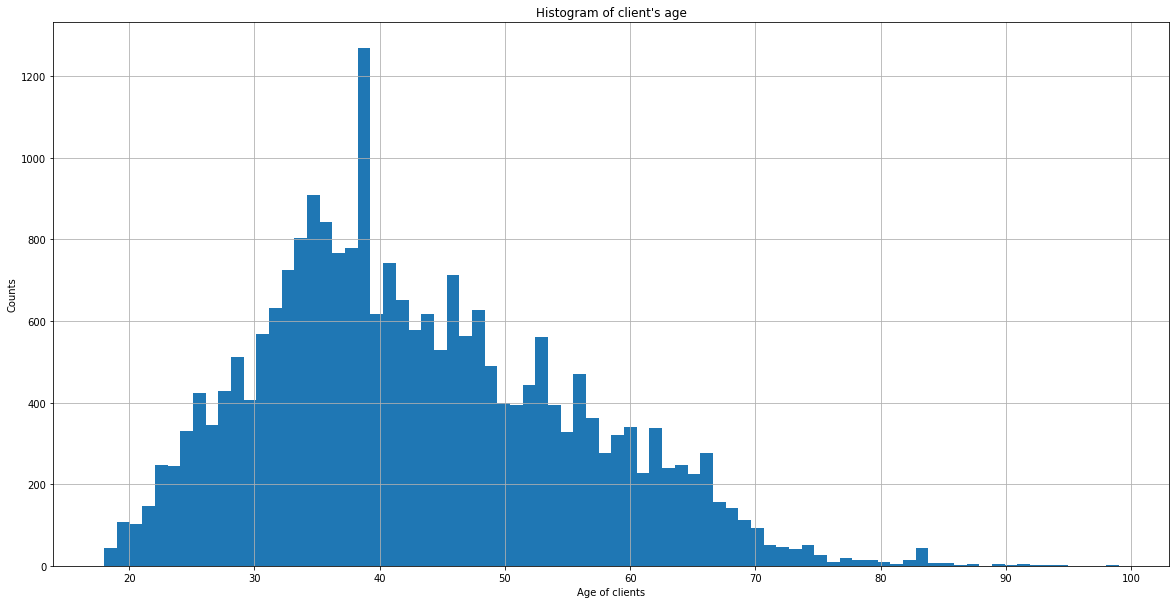

In [12]:
df["Age"].hist(bins = 80, figsize=(20,10), rwidth=1.0)
plt.xlabel("Age of clients")
plt.ylabel("Counts")
plt.title("Histogram of client's age")
plt.rcParams['axes.axisbelow'] = True

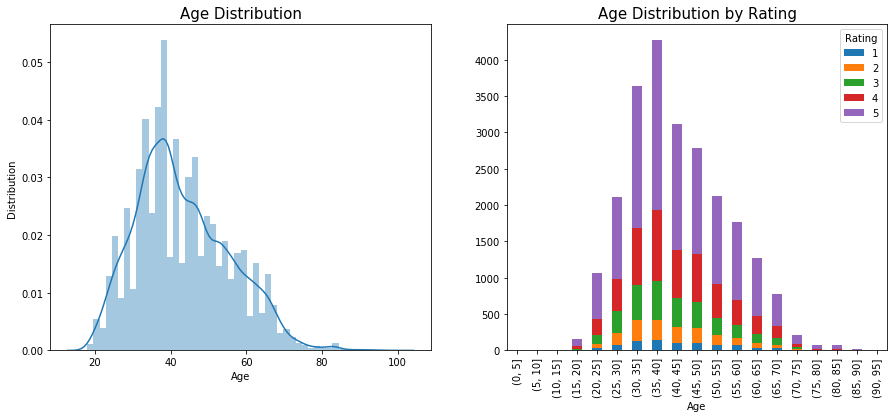

In [13]:
f, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,6))
sns.distplot(df['Age'], ax = ax[0])
ax[0].set_title('Age Distribution', fontsize=15)
ax[0].set_ylabel('Distribution')
df.groupby(['Rating',pd.cut(df['Age'], np.arange(0,100,5))]).size().unstack(0).plot.bar(stacked=True, ax=ax[1])
ax[1].set_title('Age Distribution by Rating', fontsize=15)
plt.show() 

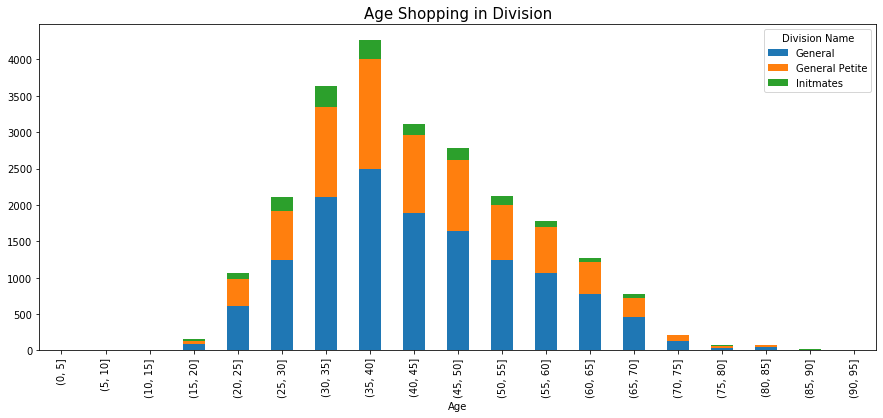

In [14]:
f, ax = plt.subplots(nrows=1, figsize=(15,6))
df.groupby(['Division Name',pd.cut(df['Age'], np.arange(0,100,5))]).size().unstack(0).plot.bar(stacked=True, ax=ax)
ax.set_title('Age Shopping in Division',fontsize=15)
plt.show()

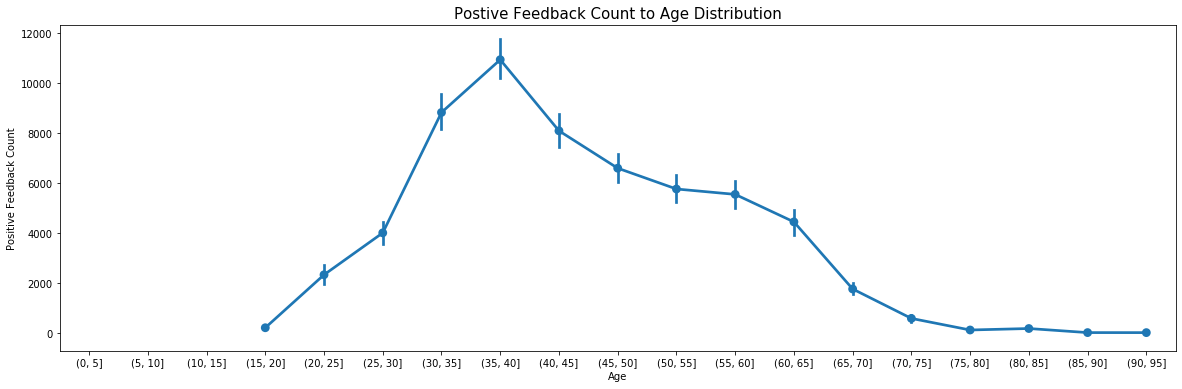

In [15]:
f, ax = plt.subplots(nrows = 1, figsize=(20,6))
sns.pointplot(x = pd.cut(df['Age'], np.arange(0,100,5)), y = df['Positive Feedback Count'], estimator = np.sum, ax=ax)
ax.set_title('Postive Feedback Count to Age Distribution', fontsize=15)
plt.show()

<li>From the above analysis, we see the core age group that shop here is age 30-45 years.
<li>This age group are matured indivudals who cared about rating the product and mostly gave the rating of 5 and also found postive feedback helpful.
<li>Age group of above 70 didn't care much about the online rating, which is mostly because they are old.
<li>The age group of 15-20 which are teenagers cared less about rating the products and also the feedback didn't back their shopping choices.
   

Text(0.5, 1.0, 'Frequency Distribution of Classification')

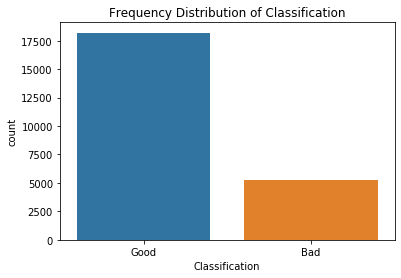

In [16]:
sns.countplot(x = 'Classification', data = df)
plt.title('Frequency Distribution of Classification')

The count for Good Class is more than Bad Class.

Text(0.5, 1.0, 'Frequency Distribution of Ratings')

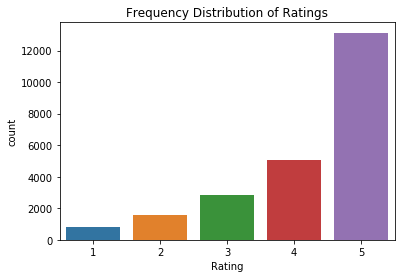

In [17]:
sns.countplot(x = 'Rating', data = df)
plt.title('Frequency Distribution of Ratings')

Ratings for 5,4,3 are high. That is most of the ratings are Good.

Text(0.5, 1.0, 'Rating Distribution per Age')

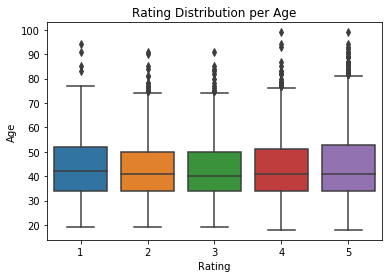

In [18]:
sns.boxplot(x = 'Rating', y = 'Age', data = df)
plt.title('Rating Distribution per Age') 

Most of the ratings are given by people in the Age range of 40 -50.

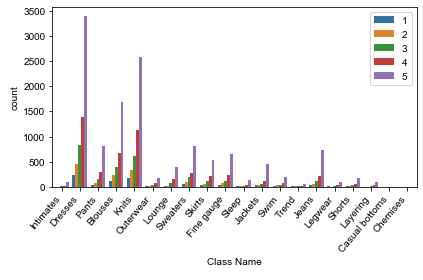

In [19]:
ax=sns.countplot(x="Class Name",hue='Rating',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.legend(loc='upper right')
sns.set(rc={'figure.figsize':(10,10)})

Most of the good ratings are for Dresses, Blouses and Knits

In [20]:
recommended = df[df['Recommended IND'] == 1]
not_recommended = df[df['Recommended IND'] == 0]

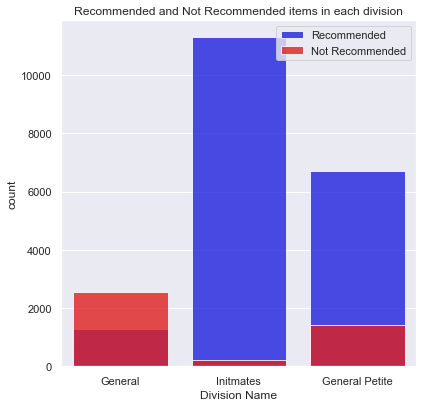

In [21]:
fig = plt.figure(figsize=(14,14))
ax = plt.subplot2grid((2,2),(0,0))
ax = sns.countplot(recommended['Division Name'], color = 'blue', alpha = 0.8, label = 'Recommended')
ax = sns.countplot(not_recommended['Division Name'], color = 'red', alpha = 0.8, label = 'Not Recommended')
ax = plt.title('Recommended and Not Recommended items in each division')
ax = plt.legend()

Intimates and General Petite items are recommended more.

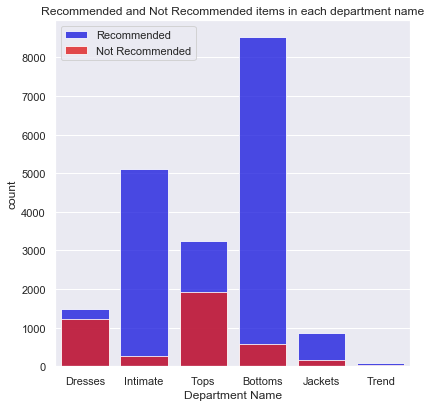

In [22]:
fig = plt.figure(figsize=(14,14))
ax = plt.subplot2grid((2,2),(0,0))
ax = sns.countplot(recommended['Department Name'], color = 'blue', alpha = 0.8, label = 'Recommended')
ax = sns.countplot(not_recommended['Department Name'], color = 'red', alpha = 0.8, label = 'Not Recommended')
ax = plt.title('Recommended and Not Recommended items in each department name')
ax = plt.legend()

Bottoms, Intimates, Tops and Jackets are being recommended more.

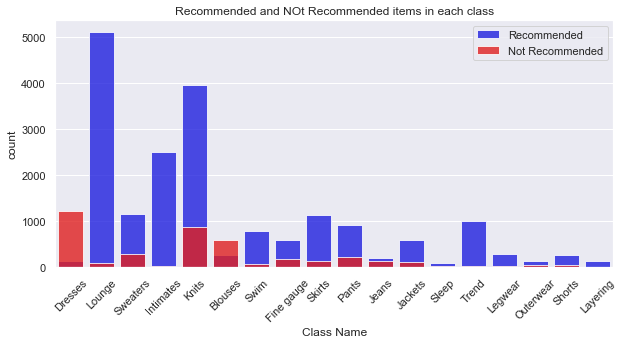

In [23]:
ax = plt.subplot2grid((2,2),(1,0), colspan = 2)
ax = plt.xticks(rotation=45)
ax = sns.countplot(recommended['Class Name'], color = 'blue', alpha = 0.8, label = 'Recommended')
ax = sns.countplot(not_recommended['Class Name'], color = 'red', alpha = 0.8, label = 'Not Recommended')
ax = plt.title('Recommended and NOt Recommended items in each class')
ax = plt.legend()

Here we can see that Dresses department and Blouses department need urgent care because no one is recommending this product.

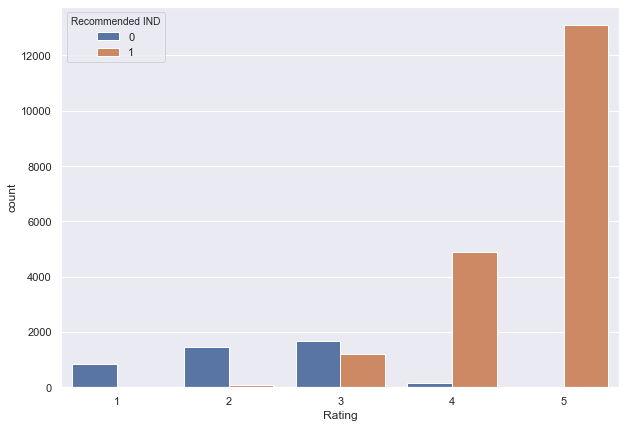

In [24]:
f,ax=plt.subplots(ncols=1,figsize=(10,7))
sns.countplot(x=df.Rating,hue=df['Recommended IND'],ax=ax)
plt.show()

Recommendation rating is more with respect to 5 and 4 stars.

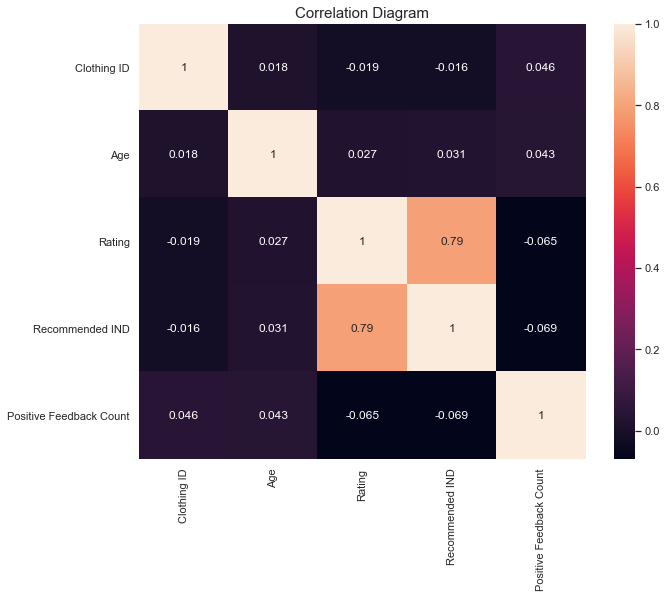

In [25]:
f, ax = plt.subplots(ncols = 1, figsize = (10,8))
sns.heatmap(df.corr(), annot = True, ax = ax)
ax.set_title('Correlation Diagram', fontsize = 15)
plt.show() 

**From the above heatmap, we can see that Rating is highly corelated to Recommanded IND**

In [26]:
#to see which product has been reviewed most
df.groupby(['Clothing ID'])['Clothing ID'].agg(counts='count').reset_index().sort_values(by='counts',ascending=False)[:10]

,Clothing ID,counts
1078,1078,1024
862,862,806
1094,1094,756
1081,1081,582
872,872,545
829,829,527
1110,1110,480
868,868,430
895,895,404
936,936,358


In [27]:
#number of good and bad reviews based on age group
age_group=pd.DataFrame(columns=['Age Group','Total Reviews','Good','Bad'])
lst=[]
for i in [[0,20],[21,30],[31,40],[41,50],[51,60],[61,70],[71,80],[81,90],[91,100]]:
    lst.append([str(i[0])+'-'+str(i[1]),df[(df.Age>=i[0]) & (df.Age<i[1])]['Classification'].count(), df[(df.Age>=i[0]) & (df.Age<i[1])].groupby('Classification')['Classification'].count()['Good'],df[(df.Age>=i[0]) & (df.Age<i[1])].groupby('Classification')['Classification'].count()['Bad']])
age_group=age_group.append(pd.DataFrame(lst,columns=['Age Group','Total Reviews','Good','Bad']),ignore_index=True)
age_group 

,Age Group,Total Reviews,Good,Bad
0,0-20,44,37,7
1,21-30,2779,2136,643
2,31-40,7295,5585,1710
3,41-50,5510,4230,1280
4,51-60,3550,2822,728
5,61-70,1964,1589,375
6,71-80,271,209,62
7,81-90,84,74,10
8,91-100,13,9,4


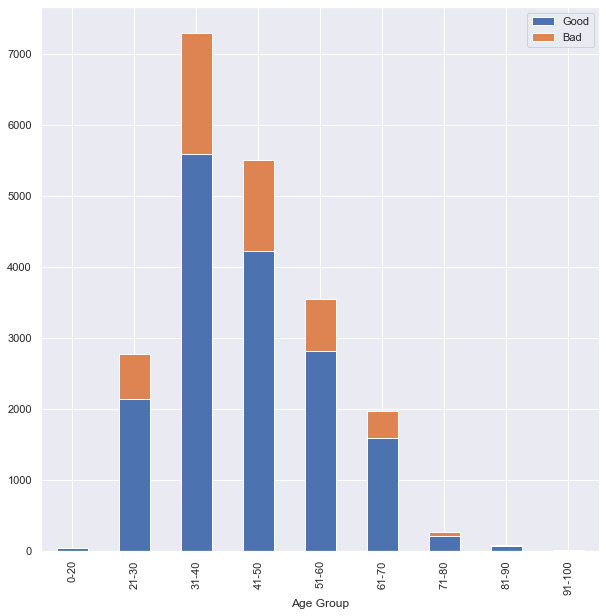

In [28]:
#plot of the number of good and bad reviews based on age group
sns.set()
age_group[['Age Group','Good','Bad']].set_index('Age Group').plot(kind='bar',stacked=True)

<li>Good and Bad both reviews are more between the age group of 31 - 60. 

<li>And we can see that the age group 71 - 100 has very less reviews.

<li>While the reviews for the age range of 21 - 30 and 61 - 70 are less too.

In [29]:
#relation between Recommended IND and review
temp=pd.DataFrame(columns=['Class','Count 1','Count 2'])
temp2=[]
for i in list([[1,0,'Good'],[1,0,'Bad']]):
    temp2.append([i[2],df[(df.Classification==i[2]) & (df['Recommended IND']==int(i[0]))]['Classification'].count(),df[(df.Classification==i[2]) & (df['Recommended IND']==int(i[1]))]['Classification'].count()])
temp = temp.append(pd.DataFrame(temp2,columns=['Classification','Count 1','Count 2']),ignore_index=True)

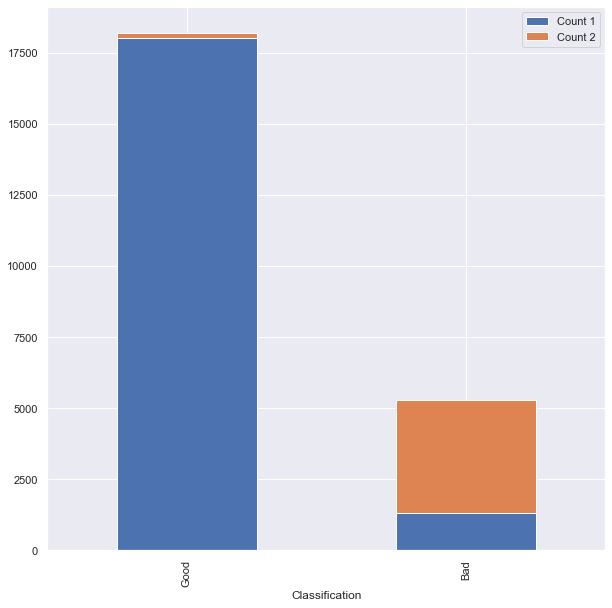

In [30]:
#plot showing the consistence and contrast between Recommended IND and review
sns.set()
temp[['Classification','Count 1','Count 2']].set_index('Classification').plot(kind='bar',stacked=True)

Good reviews are more consistent than Bad reviews. We can further look towards the Bad reviews to improve them. 

### Class Recommendation Plot

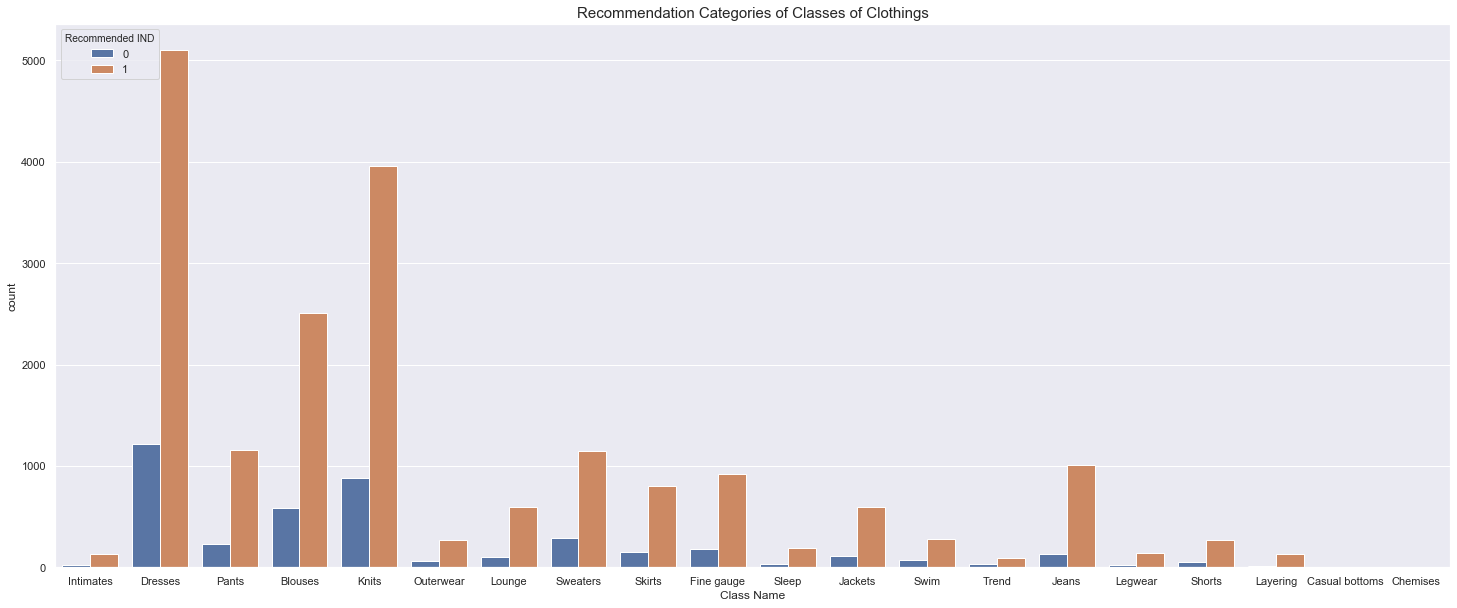

In [31]:
f,ax=plt.subplots(ncols=1,figsize=(25,10))
sns.countplot(x=df['Class Name'],hue=df['Recommended IND'],orient='H',ax=ax)
ax.set_title('Recommendation Categories of Classes of Clothings',fontsize=15)
plt.show()

From this we infer that Recommendation is directly in correlation to the count.

# Data Processing

In [32]:
df['Review Text'] = df['Review Text'].fillna('')

In [33]:
import re
import nltk
from wordcloud import WordCloud
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to C:\Users\WIN
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package stopwords to C:\Users\WIN
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
def cleanAndTokenize(review):
  text  = review.lower()
  tokenizer = nltk.tokenize.TreebankWordTokenizer()
  tokens = tokenizer.tokenize(text)
  stemmer = nltk.stem.WordNetLemmatizer()
  text = " ".join(stemmer.lemmatize(token) for token in tokens)
  text = re.sub("[^a-z']"," ", text)
  return text

df['Clean Review'] = df['Review Text'].apply(cleanAndTokenize)

In [35]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Classification,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Clean Review
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,Good,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky and sexy and comf...
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,Good,1,4,General,Dresses,Dresses,love this dress it 's sooo pretty i happene...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Bad,0,0,General,Dresses,Dresses,i had such high hope for this dress and really...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Good,1,0,General Petite,Bottoms,Pants,i love love love this jumpsuit it 's fun ...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Good,1,6,General,Tops,Blouses,this shirt is very flattering to all due to th...


In [36]:
pos_reviews = df[df['Classification'] == 'Good']
neg_reviews = df[df['Classification'] == 'Bad']

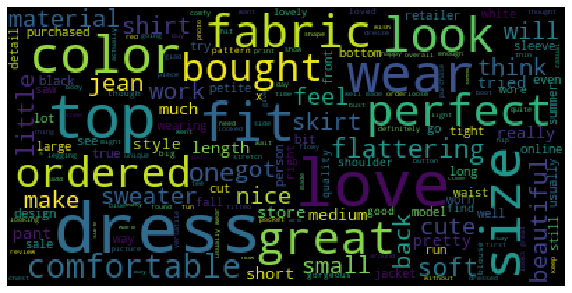

In [37]:
def word_cloud(df, bgcolor, title):
  plt.figure(figsize = (10,10))
  word_cloud = WordCloud(background_color = bgcolor, max_words = 1000, max_font_size = 50)
  word_cloud.generate(' '.join(df))
  plt.imshow(word_cloud)
  plt.axis('off')

word_cloud(pos_reviews['Review Text'], 'black', 'Most Used Words')

Most of the positive reviews are with respect to: Size, Fit, Colour, Comfort, Look, and Fabric.

Most of the clothings mentioned are: Dress, Sweater, Top. 

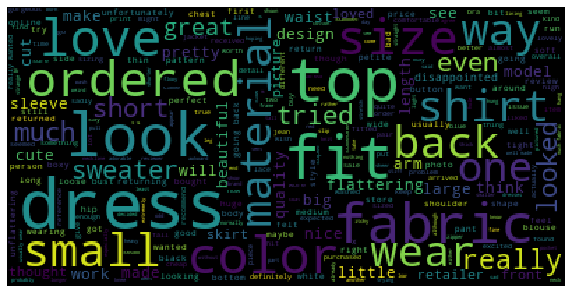

In [38]:
word_cloud(neg_reviews['Review Text'], 'black', 'Most Used Words')

Most of the Negaitive reviews are with respect to: Size, Look, Fit, Colour, Fabric, Small, Short, waist, and material.

Most of the clothings mentioned are: Dress, Shirt, and Sweater. 

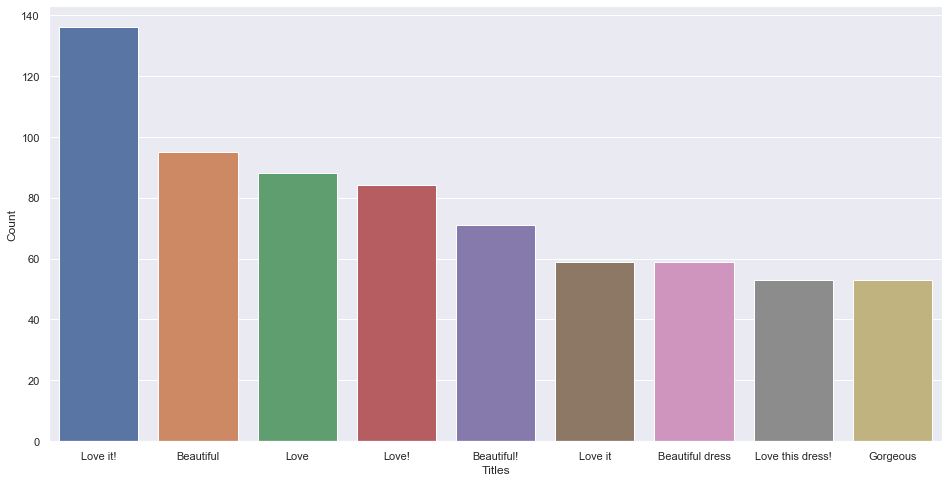

In [39]:
#the commonly used titles for positive review
a=nltk.FreqDist((pos_reviews['Title']))
d=pd.DataFrame({'Titles':list(a.keys()),'Count':list(a.values())})
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(16,8))
ax=sns.barplot(data=d,x='Titles',y='Count')
ax.set(ylabel='Count')
plt.show()

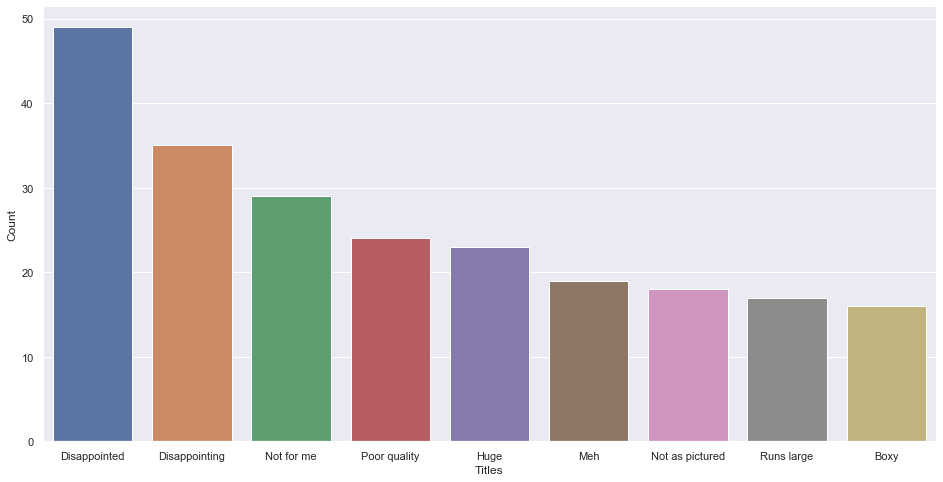

In [40]:
#the commonly used titles for negative review
a=nltk.FreqDist((neg_reviews['Title']))
d=pd.DataFrame({'Titles':list(a.keys()),'Count':list(a.values())})
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(16,8))
ax=sns.barplot(data=d,x='Titles',y='Count')
ax.set(ylabel='Count')
plt.show()


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
analyzer = vectorizer.build_analyzer()

In [42]:
def wordcounts(s):
    c = {}
    if analyzer(s):
        d = {}
        w = vectorizer.fit_transform([s]).toarray()
        vc = vectorizer.vocabulary_
        for k,v in vc.items():
            d[v]=k
        for index,i in enumerate(w[0]):
            c[d[index]] = i
    return c

df['Word Counts'] = df['Review Text'].apply(wordcounts)

In [43]:
selectedwords=['awesome','great','fantastic','extraordinary','amazing',
               'super','magnificent','stunning','impressive','wonderful',
               'breathtaking','love','content','pleased','happy','glad',
               'satisfied','lucky','shocking','cheerful','wow','sad',
               'unhappy','horrible','regret','bad','terrible','annoyed',
               'disappointed','upset','awful','hate']


def selectedcount(dic,word):
    if word in dic:
        return dic[word]
    else:
        return 0
    
dfwc = df.copy()
for word in selectedwords:
    dfwc[word] = dfwc['Word Counts'].apply(selectedcount,args=(word,))

In [44]:
word_sum = dfwc[selectedwords].sum()
print('Selected Words')
print(word_sum.sort_values(ascending=False).iloc[:10]) #first 10

print('\nClass Names')
print(df['Class Name'].fillna("Empty").value_counts().iloc[:10])

Selected Words
love            8951
great           6117
super           1726
happy            705
glad             614
disappointed     585
amazing          503
bad              392
wonderful        300
stunning         289
dtype: int64

Class Names
Dresses       6319
Knits         4843
Blouses       3097
Sweaters      1428
Pants         1388
Jeans         1147
Fine gauge    1100
Skirts         945
Jackets        704
Lounge         691
Name: Class Name, dtype: int64


**Looking at the above analysis above, we can say that the Selected Words have 8 positive words and 2 negative words out of 10.**

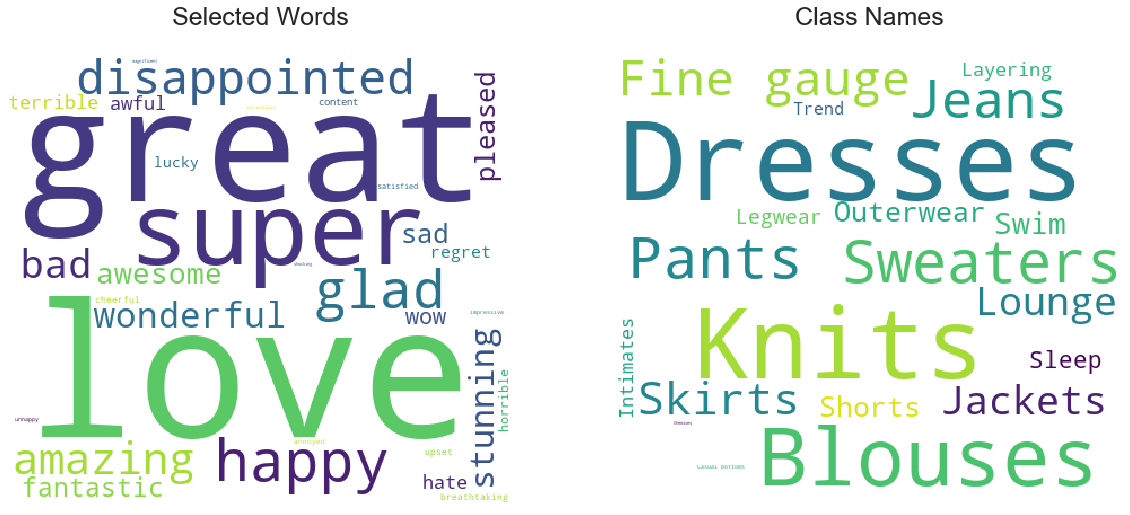

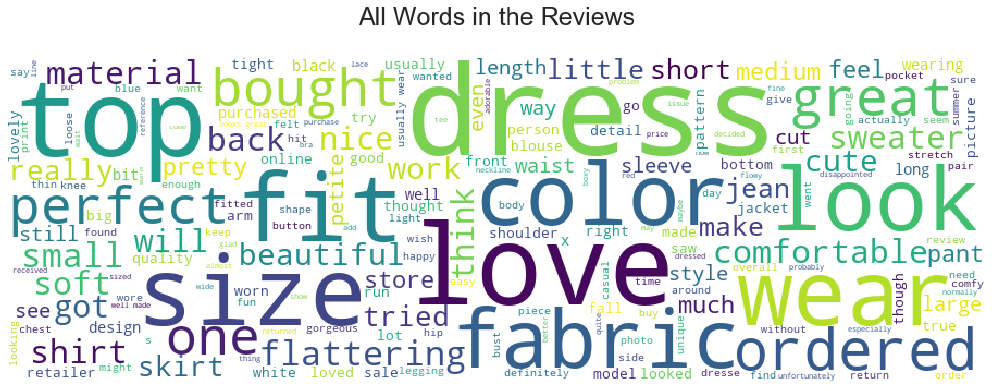

In [45]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
wc0 = WordCloud(background_color='white', width=450, height=400 ).generate_from_frequencies(word_sum)

cn = df['Class Name'].fillna(" ").value_counts()
wc1 = WordCloud(background_color='white', width=450, height=400).generate_from_frequencies(cn)

ax[0].imshow(wc0)
ax[0].set_title('Selected Words\n',size=25)
ax[0].axis('off')

ax[1].imshow(wc1)
ax[1].set_title('Class Names\n',size=25)
ax[1].axis('off')

rt = df['Review Text']
plt.subplots(figsize=(18,6))
wordcloud = WordCloud(background_color='white', width=900, height=300).generate(" ".join(rt))

plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=25)
plt.axis('off')
plt.show()

## Insights <Br>

<li>So we can see that the positive sentiments are: Love, Great, Super, Happy, Glad.
<li>The positive Class Names are: Dress, Knits, Blouses, Sweaters, Pants and Jeans.  

    
<li>These are the clothing items that people bought and reviewed more.
<li>We can further look into the items that people recommend less like: Jeans, Legwear, Shorts and Skrits to increase their sales.